### Data exploration & cleaning

In [38]:
import pandas as pd
import numpy as np

In [39]:
#Importing dataset
neo = pd.read_csv(r'C:\Users\matui\Downloads\neo.csv')

In [40]:
#First look
neo

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [41]:
neo.info()
#10 cols, 90836 rows, apparently no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [42]:
#Double check missing values
neo.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [43]:
#After the first look I want to check the value count in orbiting body and sentry object
neo.orbiting_body.value_counts()

Earth    90836
Name: orbiting_body, dtype: int64

In [44]:
neo.sentry_object.value_counts()
#Those rows are the same for the entire dataset

False    90836
Name: sentry_object, dtype: int64

In [45]:
#Dropping orbiting and sentry because unique value is not relevant in ML
del neo['sentry_object']
del neo['orbiting_body']

In [46]:
#Now let's see if we have duplicate rows
duplicate = neo[neo.duplicated()]
duplicate

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous


In [47]:
#Double check duplicate on ID \ Name
neo.id.value_counts()

2469219    43
2277810    43
3743123    40
2138175    39
3893865    38
           ..
3768019     1
3774692     1
3779049     1
3775040     1
3092229     1
Name: id, Length: 27423, dtype: int64

In [48]:
#It seems that we have multiple entry for same ID/Name
neo.loc[neo['id']==2469219]

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
912,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15334.830488,2.105350e+07,24.33,False
2169,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15860.941084,2.297678e+07,24.33,False
3972,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15382.529101,2.032125e+07,24.33,False
5128,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15285.830876,2.345715e+07,24.33,False
6988,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15464.296154,1.954735e+07,24.33,False
8091,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,14629.980565,2.383909e+07,24.33,False
10081,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15445.978808,1.880784e+07,24.33,False
11183,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,13963.527790,2.409758e+07,24.33,False
13252,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15495.759121,1.812412e+07,24.33,False
14401,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,13260.624583,2.424962e+07,24.33,False


In [49]:
#We can replace every row of the same ID by the mean and drop duplicates
#Base on the loc seen before, we don't need to replace value in each column (only distance and velocity)
id = list(neo['id'].unique())

for i in id:
    filter = neo[neo['id']==i]
    mean_vel = filter['relative_velocity'].mean()
    mean_dist = filter['miss_distance'].mean()
    neo.loc[neo[neo['id']==i].index, 'relative_velocity'] = mean_vel
    neo.loc[neo[neo['id']==i].index, 'miss_distance'] = mean_dist

In [50]:
#Dropping duplicated rows
neo = neo.drop_duplicates(subset=['id'])

In [51]:
#Checking result
neo.id.value_counts()

2162635    1
3781308    1
3841712    1
3781650    1
3781715    1
          ..
3837914    1
3323938    1
2285990    1
3799247    1
3092229    1
Name: id, Length: 27423, dtype: int64

In [52]:
#Checking new shape
neo.shape

(27423, 8)

In [53]:
#Now we need to encode hazardous, going from True/False to 1/0
#Getting number of value before for verification afterwards
neo.hazardous.value_counts()

False    25250
True      2173
Name: hazardous, dtype: int64

In [54]:
#Encoding
neo['hazardous'] = np.where(neo['hazardous']==True,1,0)

C:\Users\matui\AppData\Local\Temp/ipykernel_24636/156342386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neo['hazardous'] = np.where(neo['hazardous']==True,1,0)


In [55]:
#Result
neo.hazardous.value_counts()

0    25250
1     2173
Name: hazardous, dtype: int64

### EDA

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

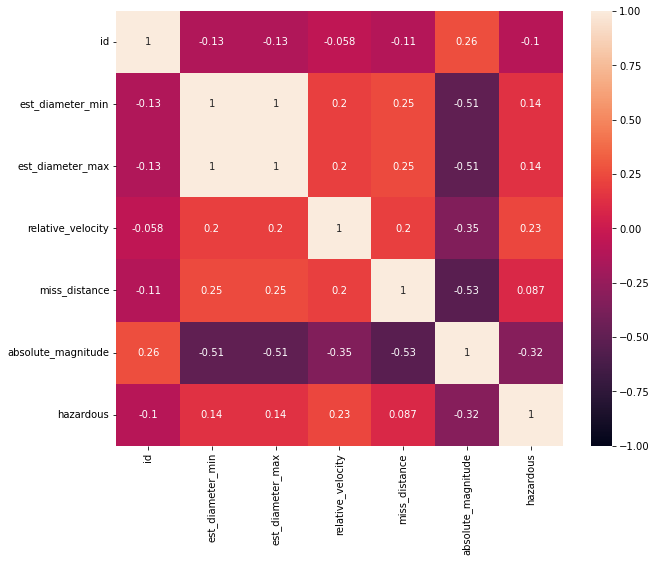

In [57]:
#Now we need to print the correlation matrix to see if some columns brings the same information
#In that case we need to drop one of those because it is not relevant for ML
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(neo.corr(), vmin=-1, vmax=1, annot=True)

In [58]:
#We can see that diameter min and max are very correlated (1), we will drop min
del neo['est_diameter_min']

In [59]:
#Boxplot as they give a lot of informations regarding the distribution of data
#First get column list
neo.columns

Index(['id', 'name', 'est_diameter_max', 'relative_velocity', 'miss_distance',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

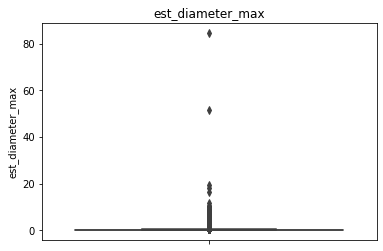

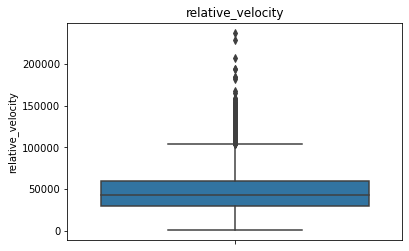

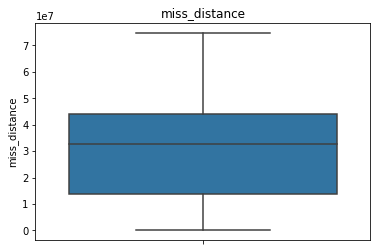

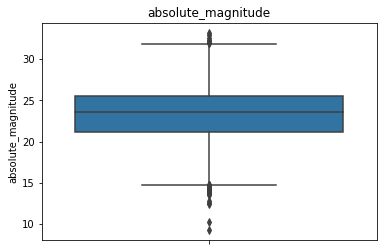

In [60]:
#Keeping only numeric data that make sense plotting (delete ID and hazardous from list)
col = ['est_diameter_max', 'relative_velocity', 'miss_distance',
       'absolute_magnitude']

for i in col:
    sns.boxplot(data = neo, y=i)
    plt.title(i)
    plt.show()

In [64]:
#We can see that 3 columns contains outliers
#Import to keep that in mind so we can try model with and without outliers
#The data should be cleaned by now
neo.to_csv(r'C:\Users\matui\Downloads\neo_cleaned.csv')

### Model building

Models to be done:

RidgeClassifier - SVC - CategoricalNB - ExtraTreesClassifier - Gradient Boosting - Linear Discriminant Analysis - LinearSVC - KNeighborsClassifier